In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline

In [32]:
data = pd.read_csv('data/macrodata.csv', parse_dates=True, index_col=0)
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


<AxesSubplot:>

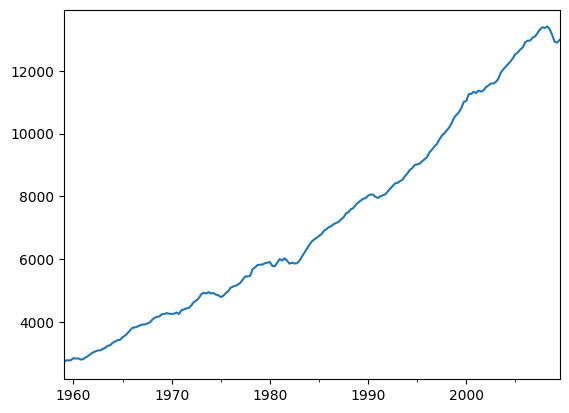

In [3]:
data.realgdp.plot()

## Using Statsmodels to get the trend
<div class="alert alert-info"><h3>Related Function:</h3>
<tt><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.filters.hp_filter.hpfilter.html'><strong>statsmodels.tsa.filters.hp_filter.hpfilter</strong></a><font color=black>(X, lamb=1600)</font>&nbsp;&nbsp;Hodrick-Prescott filter</div>
    
The <a href='https://en.wikipedia.org/wiki/Hodrick%E2%80%93Prescott_filter'>Hodrick-Prescott filter</a> separates a time-series  $y_t$ into a trend component $\tau_t$ and a cyclical component $c_t$

$y_t = \tau_t + c_t$

The components are determined by minimizing the following quadratic loss function, where $\lambda$ is a smoothing parameter:

$\min_{\\{ \tau_{t}\\} }\sum_{t=1}^{T}c_{t}^{2}+\lambda\sum_{t=1}^{T}\left[\left(\tau_{t}-\tau_{t-1}\right)-\left(\tau_{t-1}-\tau_{t-2}\right)\right]^{2}$


The $\lambda$ value above handles variations in the growth rate of the trend component.<br>When analyzing quarterly data, the default lambda value of 1600 is recommended. Use 6.25-100 for annual data, and 14400-129,600 for monthly data.<br>
Higher the value of lambda lesser will be the variation in trend.

In [33]:
gdp_cycle, gdp_trend = hpfilter(data.realgdp, lamb=1600)

<AxesSubplot:>

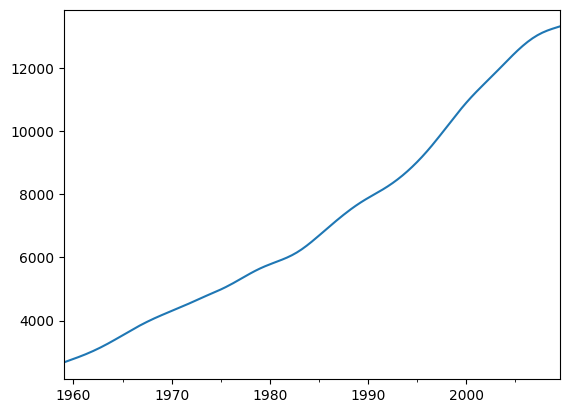

In [34]:
gdp_trend.plot()

<AxesSubplot:>

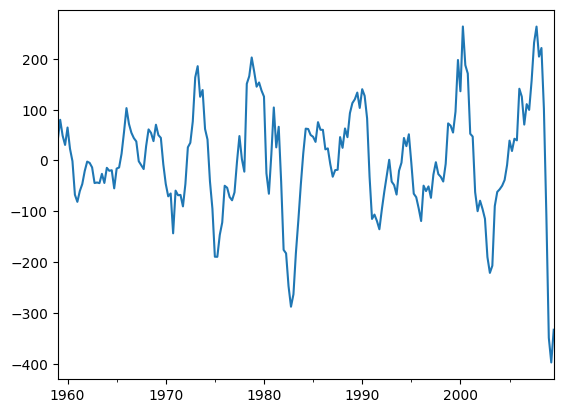

In [35]:
gdp_cycle.plot()

In [36]:
data['gdp_trend'] = gdp_trend
data['gdp_cycle'] = gdp_cycle

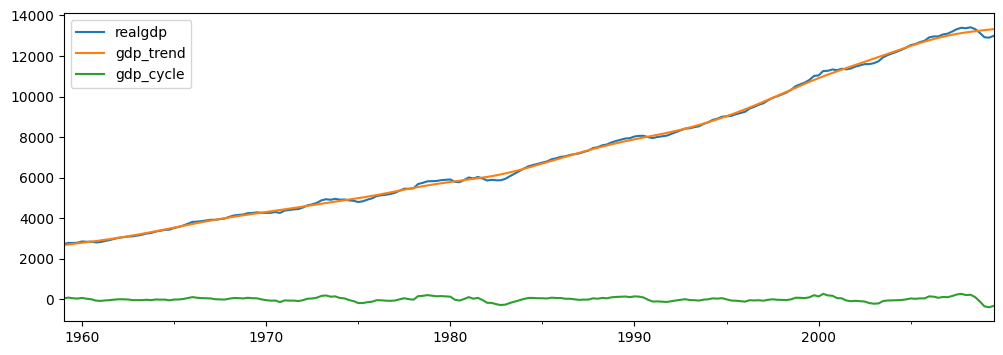

In [37]:
data[['realgdp', 'gdp_trend', 'gdp_cycle']].plot(figsize=(12,4));

## ETS

## Error/Trend/Seasonality Models


## Seasonal Decomposition
We apply an <strong>additive</strong> model when it seems that the trend is more linear and the seasonality and trend components seem to be constant over time (e.g. every year we add 10,000 passengers).<br>
A <strong>multiplicative</strong> model is more appropriate when we are increasing (or decreasing) at a non-linear rate (e.g. each year we double the amount of passengers).


In [2]:
airline = pd.read_csv('data/airline_passengers.csv', parse_dates=True, index_col='Month')
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [10]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


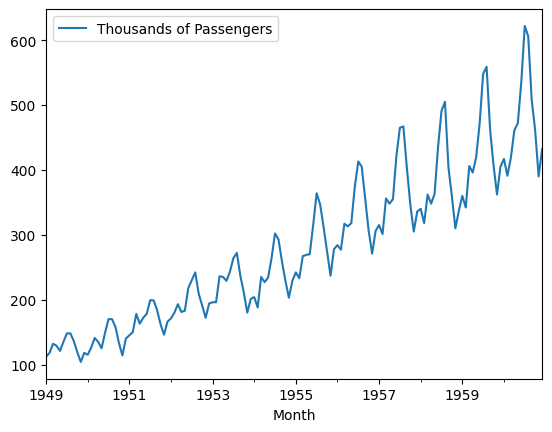

In [11]:
airline.plot();

In [39]:
result = seasonal_decompose(airline['Thousands of Passengers'], model='additive')

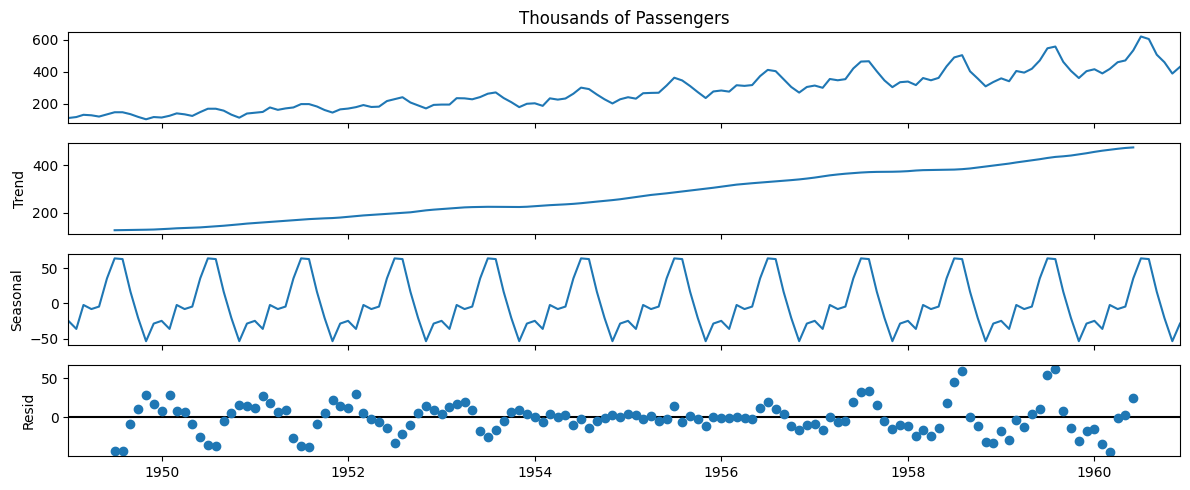

In [40]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,5

result.plot();

In [41]:
result = seasonal_decompose(airline['Thousands of Passengers'], model='mulitiplicative')

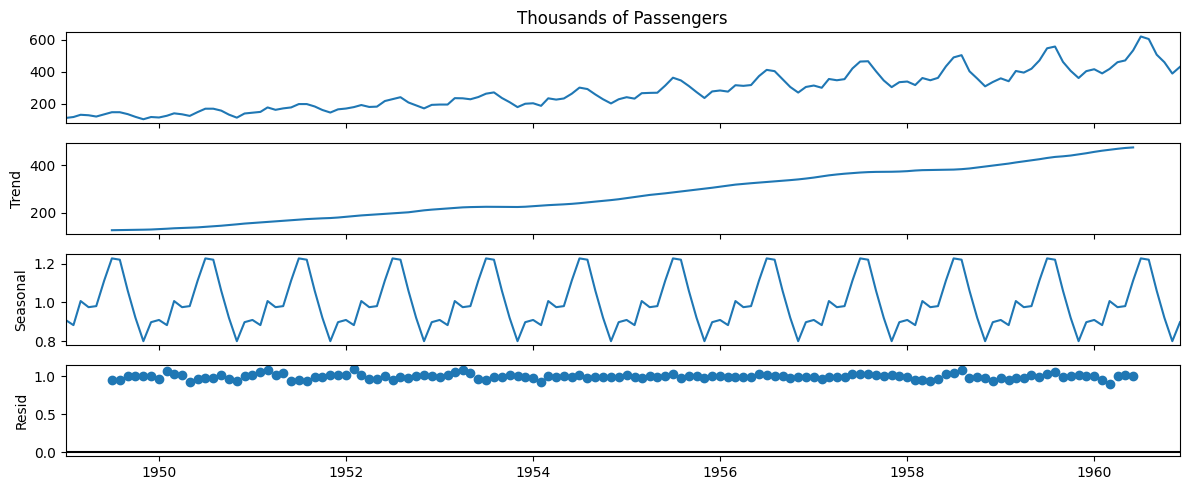

In [42]:
result.plot();

we use additive model when seasonality is constant through out the data but multiplicative when seasonality varies proportional to the level of series
<br> and hence we will prefere multiplicative model here

increasing trend, July and august has max no. of passengerst, overall increasing trend and some seasonality is also present hence we can say timseries is not stationary